In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [2]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

# 1. Dataset Statistics

In [3]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [4]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(0, 1), mean=0.39738988580750406, variance=0.23954932085067235, skewness=0.41936632478193103, kurtosis=-1.824131885638896)

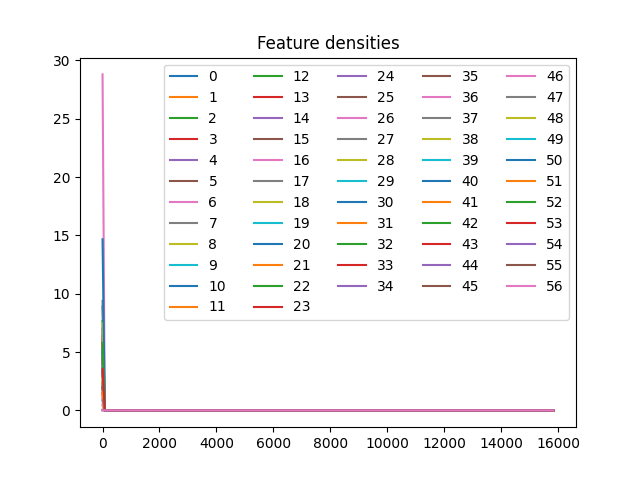

In [5]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title("Feature densities")
plt.savefig("kernel-densities.png")

In [6]:
print("Maximum value in dataset: ", np.max(X))
print("Minimum value in dataset: ", np.min(X))
print("Average value of dataset: ", np.mean(X))
print("Standard deviation of dataset: ", np.std(X))

Maximum value in dataset:  15841.0
Minimum value in dataset:  0.0
Average value of dataset:  6.135144712515383
Standard deviation of dataset:  93.5225425895577


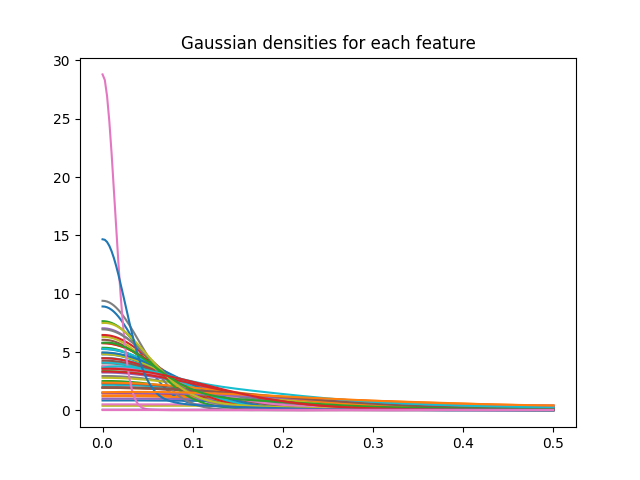

In [7]:
# this plots is not really helpful; go now explore further
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, 0.5, 200)
for j in range(D):
    density = densities[j](xs)
    plt.plot(xs, density, label = j)
    max_density = np.max(density)
    # plt.text(0.1, max_density, features[j], ha='center', va='center')
plt.title("Gaussian densities for each feature")
plt.show()
# plt.savefig("gaussian-densities.png")

In [8]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
Xz = (X - mu) / sigma
Xtestz = (Xtest - mu) / sigma

In [9]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
# print(np.mean(Xz, axis=0))  # should be all 0
# print(np.var(Xz, axis=0))  # should be all 1
mean_of_test = np.mean(Xtestz, axis=0)  # what do you get here?
print(mean_of_test)
print("Min mean of Xtestz",np.min(mean_of_test))
print("Max mean of Xtestz",np.max(mean_of_test))
print(np.var(Xtestz, axis=0))
print("Min var of Xtestz",np.min(np.var(Xtestz, axis=0)))
print("Max var of Xtestz",np.max(np.var(Xtestz, axis=0)))
# print(np.sum(Xz ** 3)) # should be: 1925261.15

[-5.73600192e-02 -3.37389835e-02  4.02481250e-02  5.51233798e-03
 -2.51229644e-02  1.67364997e-03  5.29785531e-03 -1.38875040e-02
  1.29802458e-02 -1.00804532e-02  2.68026912e-02  1.46804853e-02
  1.28455840e-02  9.34193448e-02 -1.71666713e-02  6.17841473e-02
 -3.08405298e-02 -1.02710095e-02  1.49139906e-03  6.82438979e-02
 -2.45179646e-02 -4.53675036e-03 -3.12737328e-03  4.09841941e-02
  3.76515934e-02  1.15494599e-02 -3.73018154e-03  6.55839018e-02
 -4.82178216e-02  2.44089391e-02  1.64408852e-02 -1.81514851e-02
  2.47142980e-02 -1.61248615e-02  1.75684573e-02 -1.33686432e-02
 -4.40153254e-02  1.11212504e-02  2.40959269e-02 -1.06211719e-02
 -2.06246544e-02  6.23149655e-04 -3.45073187e-02  4.24615929e-02
 -1.59254291e-02  9.77429328e-05  6.85319587e-03  5.38462415e-03
  7.89156240e-03  6.81007462e-03 -2.97234292e-02  1.23785037e-02
 -3.82610483e-02 -5.29891640e-02  3.19860888e-02 -6.82149671e-03
  5.35333143e-03]
Min mean of Xtestz -0.05736001918038197
Max mean of Xtestz 0.09341934475

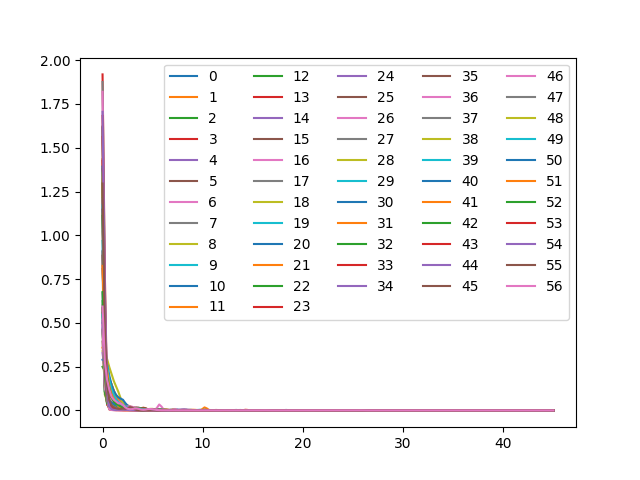

In [10]:
#Explore the normalized data
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(Xz), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
# plt.title("Normalized feature densities")
plt.savefig("normalized-kernel-densities.png")

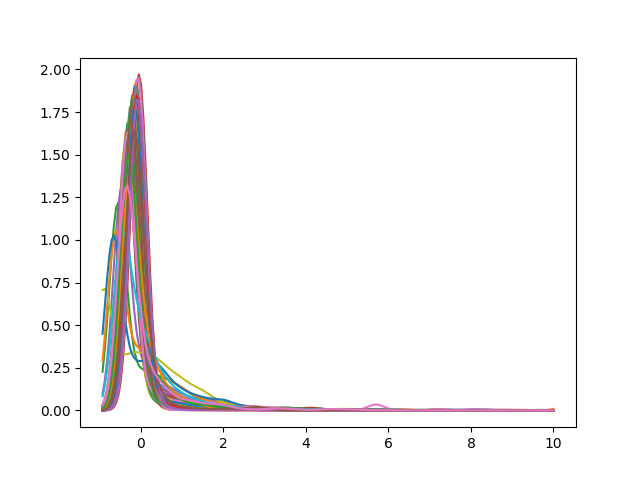

In [11]:
#Explore the normalized data
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(np.min(Xz), 10, 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
# plt.legend(ncol=5)
# plt.title("Trunca feature densities")
plt.savefig("normalized-gaussian-densities.png")

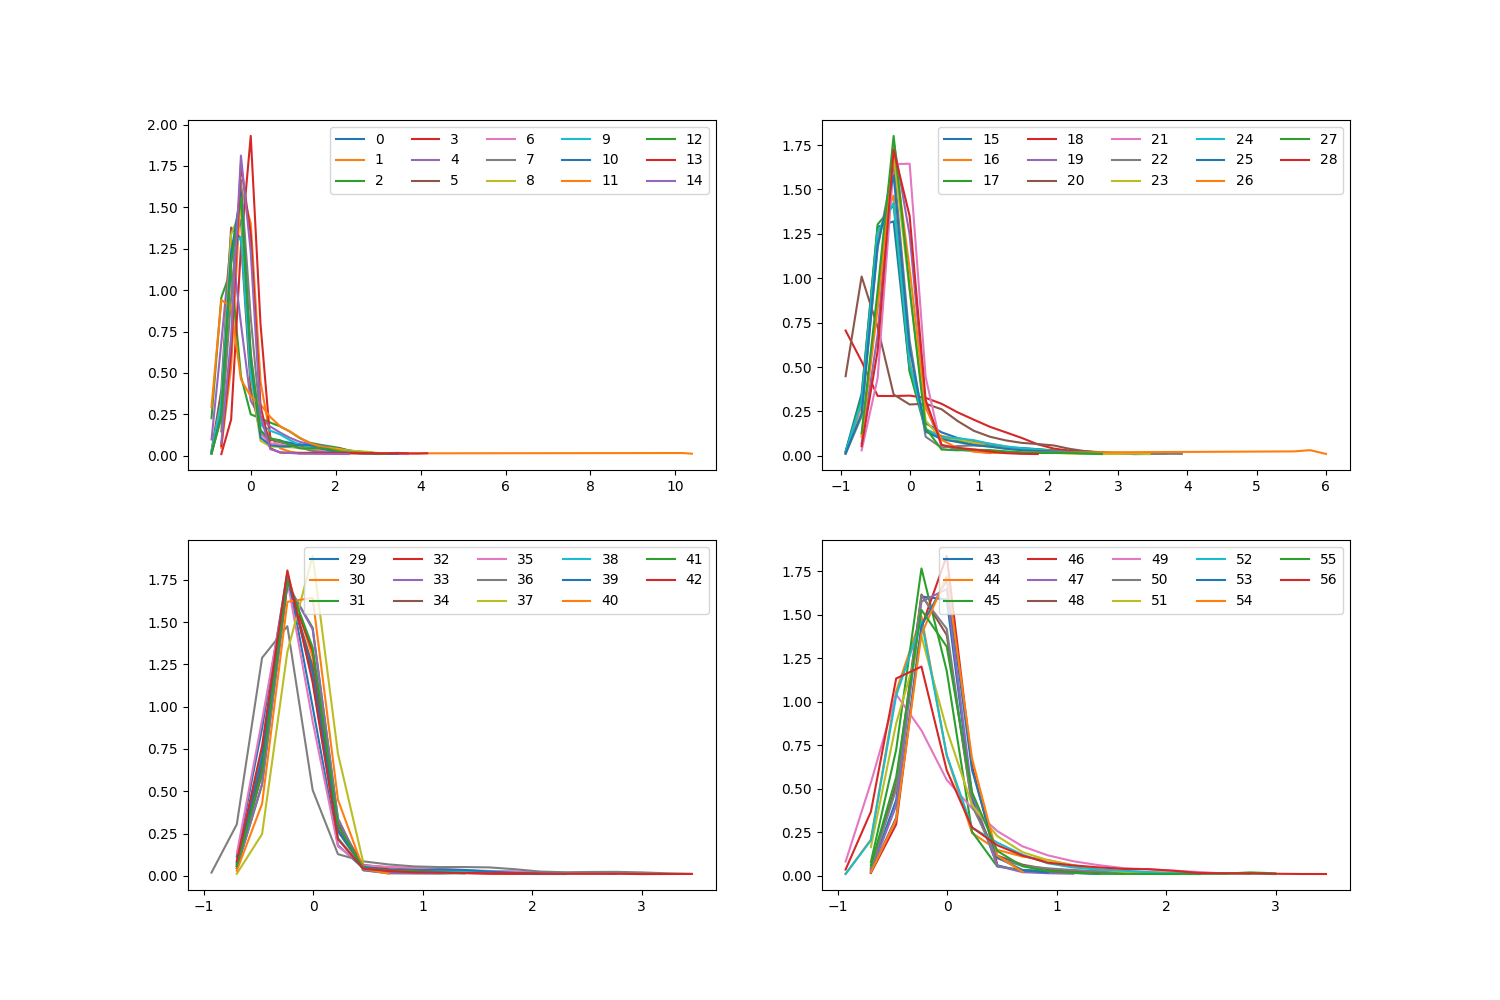

In [12]:
# Explore the normalized data
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
max_value = np.max(Xz)
xs = np.linspace(np.min(Xz), max_value, 200)
# create two subplots
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10))

import numpy as np

# divide range D into 4 equal parts
D_parts = np.array_split(range(D), 4)
# plot the features with values over 10
for j in range(D):
    xs_filtered = xs[densities[j](xs) > 0.01]
    if j in D_parts[0]:
        ax1.plot(xs_filtered, densities[j](xs_filtered), label=j)
    elif j in D_parts[1]:
        ax2.plot(xs_filtered, densities[j](xs_filtered), label=j)
    elif j in D_parts[2]:
        ax3.plot(xs_filtered, densities[j](xs_filtered), label=j)
    elif j in D_parts[3]:
        ax4.plot(xs_filtered, densities[j](xs_filtered), label=j)

ax1.legend(ncol=5)
ax2.legend(ncol=5)
ax3.legend(ncol=5)
ax4.legend(ncol=5)



# 2. Maximum Likelihood Estimation

## Helper functions

In [13]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

### Sigma and logsigma with logsumexp

We know sigma as $\frac{1}{1+e^{-x}}$
and logsigma as $log(sigma) = log(\frac{1}{1+e^{-x}}) = -log(1+e^{-x})$

We can see that logsigma takes the for of a log of a sum of exponenets. Where the sum consists of $e^{0}$ and $e^{-x}$. We can use the logsumexp trick to make sure we dont get underflow problems. our input for the logsumexp is then then $[0, -x]$ where we make sure 0 is the same dimension as x.

When we have logsigma we can easily get sigma by just takeing the exponential of logsigma.

In [14]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    if isinstance(x, np.ndarray):
        return -logsumexp(np.array([np.zeros(x.shape), -x]))
    return -logsumexp(np.array([0,-x]))

# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    return np.exp(logsigma(x))

In [15]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[0.5, array([0.26894142, 0.5       , 0.73105858])]

In [16]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[-0.6931471805599453, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [17]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """

    return np.sum(y * logsigma(X @ w) + (1 - y) * logsigma(-(X @ w)))

    # return np.sum(y * (X @ w) - np.log(1 + np.exp(X @ w)))

In [18]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

-47066.64166782577

In [19]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    return X.T @ (y - sigma(X @ w))

In [20]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [21]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [22]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return w + eps * dl(y, X, w)

    return (objective, update)

In [23]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[47066.64166782577,
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+00,  4.629534

In [24]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

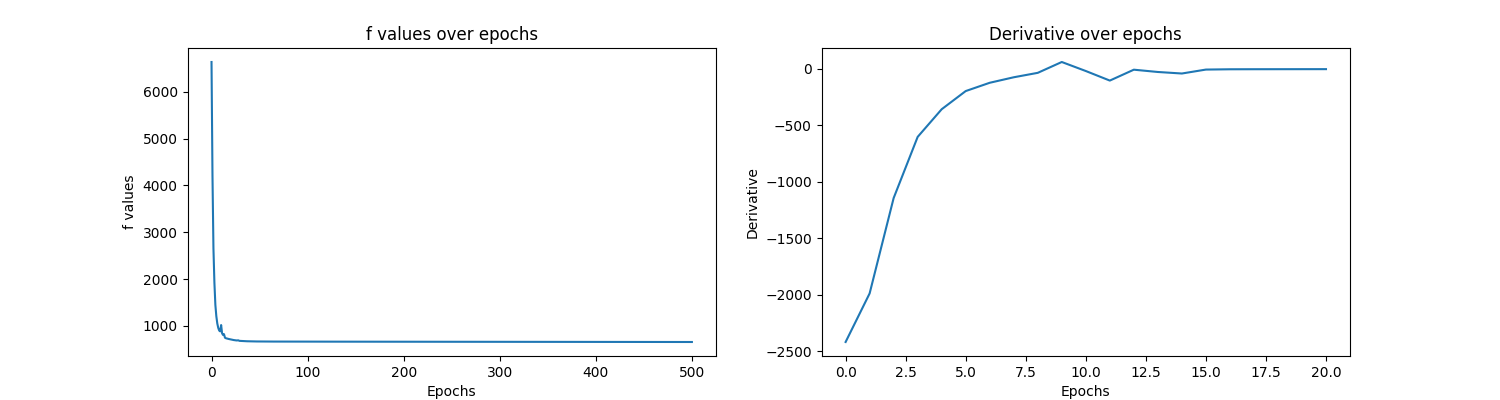

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# assuming f_values is a list of f values and num_epochs is the number of epochs
num_epochs = len(vz_gd)

# Plot for f values over epochs and derivative over epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Plot for f values over epochs
ax1.plot(range(num_epochs), vz_gd)
ax1.set_title('f values over epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f values')

# Plot for derivative over epochs
derivative = np.gradient(vz_gd)
ax2.plot(range(21), derivative[:21])
ax2.set_title('Derivative over epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Derivative')

plt.show()

## 2d Stochastic gradient descent

In [26]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).

    N = X.shape[0]
    indices = np.random.permutation(N)
    for i in indices:
        w = w + eps *(y[i] - sigma(X[i] @ w)) * X[i]
    
    return w

In [27]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [28]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        return -l(y, X, w)
    
    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [29]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[40.86497304569508,
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.433624

In [30]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   958.654, eps=0.010500000
Epoch   2: f=   786.651, eps=0.011025000
Epoch   3: f=   738.739, eps=0.011576250
Epoch   4: f=   718.166, eps=0.012155063
Epoch   5: f=   709.413, eps=0.012762816
Epoch   6: f=   696.048, eps=0.013400956
Epoch   7: f=   701.674, eps=0.006700478
Epoch   8: f=   686.406, eps=0.007035502
Epoch   9: f=   683.692, eps=0.007387277
Epoch  10: f=   684.500, eps=0.003693639
Epoch  11: f=   679.969, eps=0.003878321
Epoch  12: f=   679.230, eps=0.004072237
Epoch  13: f=   678.181, eps=0.004275848
Epoch  14: f=   677.570, eps=0.004489641
Epoch  15: f=   676.763, eps=0.004714123
Epoch  16: f=   675.966, eps=0.004949829
Epoch  17: f=   676.625, eps=0.002474914
Epoch  18: f=   675.185, eps=0.002598660
Epoch  19: f=   674.531, eps=0.002728593
Epoch  20: f=   674.095, eps=0.002865023
Epoch  21: f=   673.692, eps=0.003008274
Epoch  22: f=   673.359, eps=0.003158688
Epoch  23: f=   673.075, eps=0.003316622
Epoch  24: f=   

## 2e Compare GD and SGD

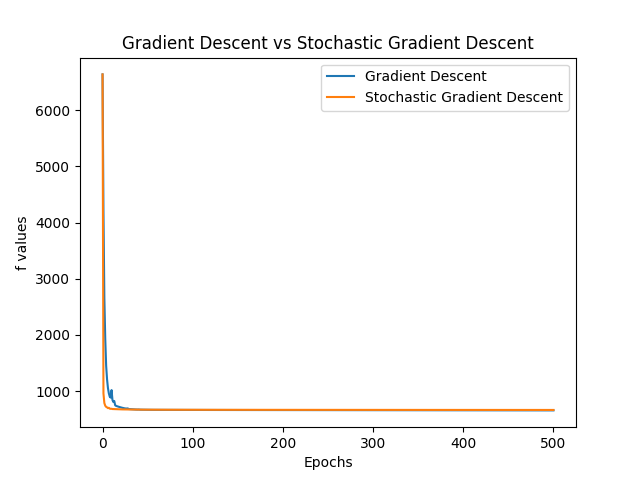

In [31]:
nextplot()
plt.plot(vz_gd, label="GD")
plt.plot(vz_sgd, label="SGD")
plt.title("Gradient Descent vs Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("f values")
plt.legend(["Gradient Descent", "Stochastic Gradient Descent"])
plt.show()
plt.savefig("gd-vs-sgd.png")

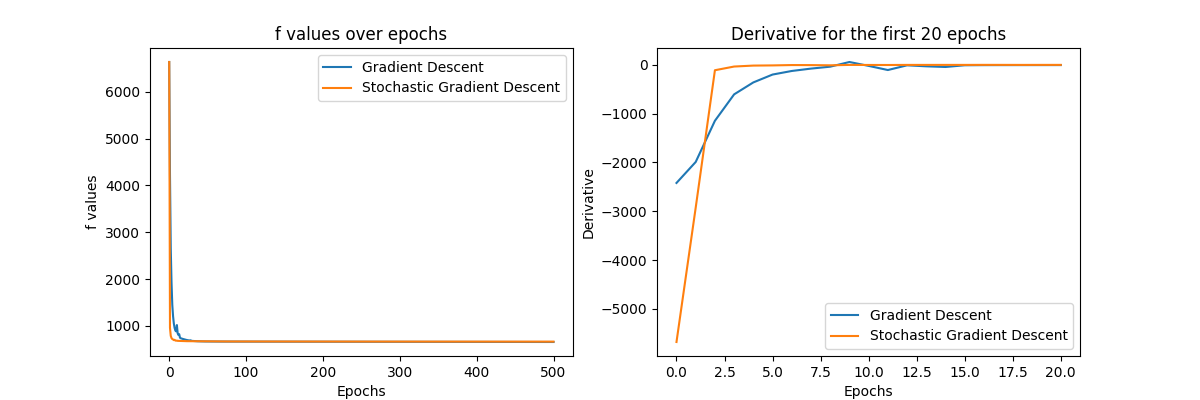

In [32]:
# assuming f_values is a list of f values and num_epochs is the number of epochs
num_epochs = len(vz_gd)

# Plot for f values over epochs and derivative over epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot for f values over epochs
ax1.plot(vz_gd)
ax1.plot(vz_sgd)
ax1.set_title('f values over epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f values')
ax1.legend(['Gradient Descent', 'Stochastic Gradient Descent'])

# Plot for derivative over epochs
derivative_gd = np.gradient(vz_gd)
derivative_sgd = np.gradient(vz_sgd)
ax2.plot(range(21), derivative_gd[:21])
ax2.plot(range(21), derivative_sgd[:21])
ax2.set_title('Derivative for the first 20 epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Derivative')
ax2.legend(['Gradient Descent', 'Stochastic Gradient Descent'])

plt.show()
plt.savefig("fvalues-and-derivatives.png")

# nextplot()
# plt.plot(vz_gd)
# plt.plot(vz_sgd)
# plt.xscale('log')
# plt.title('f values plotted on a logarithmic scale')
# plt.xlabel('Epochs')
# plt.ylabel('f values')
# plt.legend(['Gradient Descent', 'Stochastic Gradient Descent'])
# plt.show()


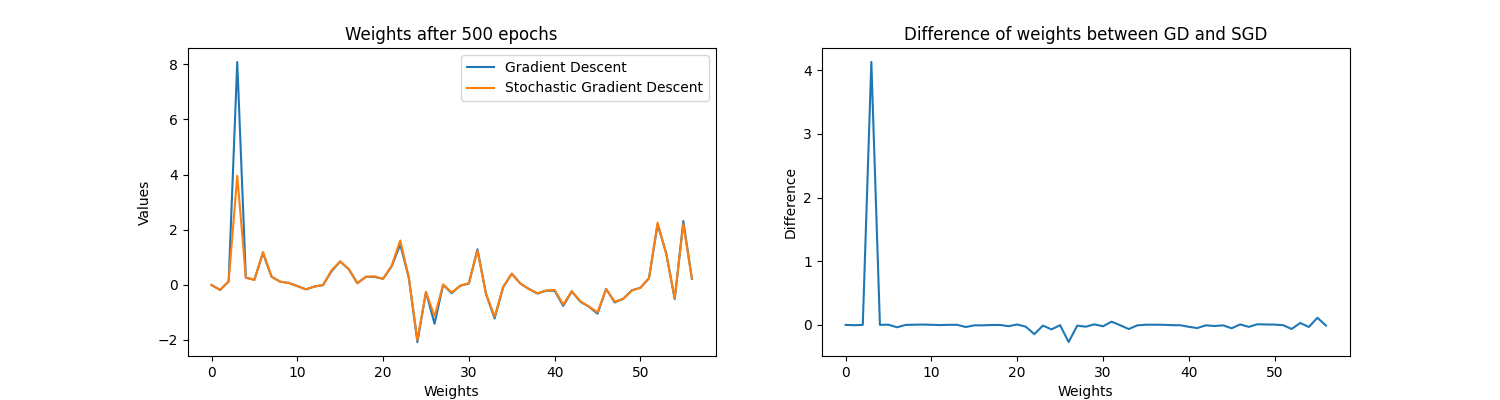

Feature with the max weight
GD:	word_freq_3d with value: 8.0862572060607
SGD:	word_freq_3d with value: 3.957167217169085
Feature with the min weight
GD:	word_freq_hp with value: -2.077676321326102
SGD:	word_freq_hp with value: -2.0062143837904616

The three highest absolute differences are:
Feature             GD             SGD            Difference     
word_freq_3d        8.0863         3.9572         4.1291         
word_freq_george    -1.4161        -1.1466        0.2696         
word_freq_000       1.4617         1.6087         0.1470         


In [33]:
# taking a look at the weights


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# assuming wz_gd and wz_sgd are arrays of weights
ax1.plot(wz_gd,)
ax1.plot(wz_sgd)
ax1.set_title('Weights after 500 epochs')
ax1.set_xlabel('Weights')
ax1.set_ylabel('Values')
ax1.legend(['Gradient Descent', 'Stochastic Gradient Descent'])

ax2.plot(wz_gd - wz_sgd)
ax2.set_title('Difference of weights between GD and SGD')
ax2.set_xlabel('Weights')
ax2.set_ylabel('Difference')
plt.show()

# printing min and max to see if there is a difference in whats most important
max_gd = np.argmax(wz_gd)
max_sgd = np.argmax(wz_sgd)
print("Feature with the max weight")
print('GD:\t{} with value: {}'.format(features[max_gd],wz_gd[max_gd]))
print('SGD:\t{} with value: {}'.format(features[max_sgd],wz_sgd[max_sgd]))

min_gd = np.argmin(wz_gd)
min_sgd = np.argmin(wz_sgd)
print("Feature with the min weight")
print('GD:\t{} with value: {}'.format(features[min_gd],wz_gd[min_gd]))
print('SGD:\t{} with value: {}'.format(features[min_sgd],wz_sgd[min_sgd]))


# the three highest absolute differences
diff = abs(wz_gd - wz_sgd)
max_diff = np.argsort(diff)[-3:]

headers = ['Feature', 'GD', 'SGD', 'Difference']

print('\nThe three highest absolute differences are:')
print('{:<20}{:<15}{:<15}{:<15}'.format(*headers))

for i in reversed(max_diff):
    row = [features[i], wz_gd[i], wz_sgd[i], diff[i]]
    print('{:<20}{:<15.4f}{:<15.4f}{:<15.4f}'.format(*row))


# 3 Prediction

In [34]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""

    return sigma(Xtest @ w)

def classify(Xtest, w, threshold=0.5):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    #
    return predict(Xtest, w) >= threshold

In [35]:
# Example: confusion matrix
yhat_gd = predict(Xtestz, wz_gd)
ypred_gd = classify(Xtestz, wz_gd)
print("Gradient Descent")
print(sklearn.metrics.confusion_matrix(ytest, ypred_gd))  # true x predicted

yhat_sgd = predict(Xtestz, wz_sgd)
ypred_sgd = classify(Xtestz, wz_sgd)
print("Stochastic Gradient Descent")
print(sklearn.metrics.confusion_matrix(ytest, ypred_sgd))  # true x predicted

Gradient Descent
[[887  54]
 [ 71 524]]
Stochastic Gradient Descent
[[886  55]
 [ 72 523]]


### Choosing the threshold
It is better that a few spam emails get through than that legit emails get classified as spam. So we want a high probability of a email being spam to classify it as spam.

- We can either try to maximize the recall of the not-spam class. In other words, make sure we that we classify as many as the not spam movies as spam as possible.

- Or we can try to maximize the precision of the spam class. In other words, make sure that out of all the movies we classified as spam, as many as possible are actually spam.

We choose to focus on the recall of the not-spam class since it takes all of the not-spam examples into account.



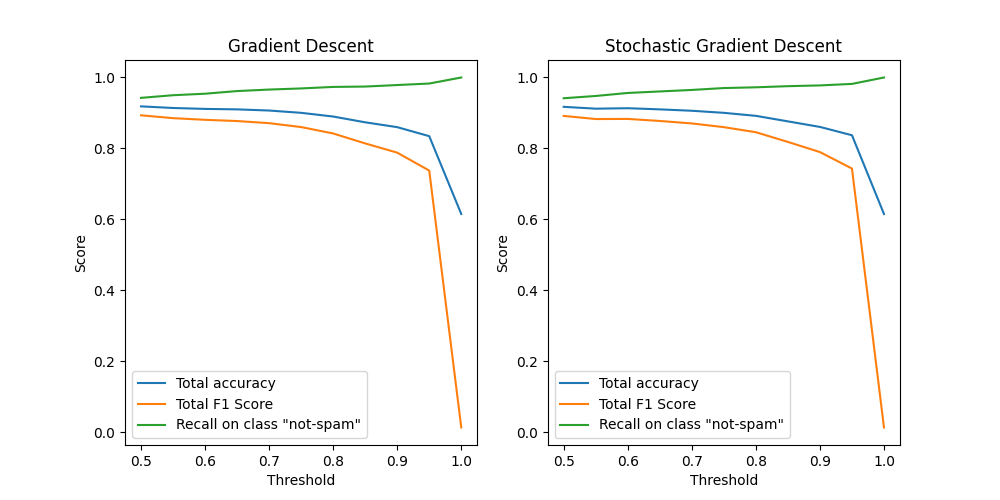

In [36]:
accuracy_gd =[]
f1_gd= []
recall_gd = []
accuracy_sgd =[]
f1_sgd= []
recall_sgd = []
thresholds=np.linspace(0.5,1,11)
for threshold in thresholds:
    for weight,accuracy,f1,recall in [(wz_gd,accuracy_gd,f1_gd,recall_gd),(wz_sgd,accuracy_sgd,f1_sgd,recall_sgd)]:
        ypred = classify(Xtestz, weight)
        accuracy.append(sklearn.metrics.accuracy_score(ytest, classify(Xtestz, weight, threshold)))
        recall.append(sklearn.metrics.recall_score(ytest, classify(Xtestz, weight, threshold), pos_label=0))
        f1.append(sklearn.metrics.f1_score(ytest, classify(Xtestz, weight, threshold)))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(thresholds, accuracy_gd, label='Total accuracy')
ax1.plot(thresholds, f1_gd, label='Total F1 Score')
ax1.plot(thresholds, recall_gd, label='Recall on class "not-spam"')

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Gradient Descent')
ax1.legend()

# Plot for sgd
ax2.plot(thresholds, accuracy_sgd, label='Total accuracy')
ax2.plot(thresholds, f1_sgd, label='Total F1 Score')
ax2.plot(thresholds, recall_sgd, label='Recall on class "not-spam"')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Stochastic Gradient Descent')
ax2.legend()

plt.show()
# plt.savefig('thresholds.png')


We see that as we reach a threshold of 0.8 the F1 score and accuracy starts to drop a lot. So we try to pick a threshold between 0.5 and 0.8 where we still have a pretty slow decrease in F1 score and accuracy.

We choose 0.7

In [37]:
yhat_gd = predict(Xtestz, wz_gd)
ypred_gd = classify(Xtestz, wz_gd)
print("Gradient Descent with threshold = 0.5")
print(sklearn.metrics.confusion_matrix(ytest, ypred_gd))  # true x predicted
chosen_threshold = 0.7

yhat_gd = predict(Xtestz, wz_gd)
ypred_gd = classify(Xtestz, wz_gd, chosen_threshold)
print("Gradient Descent with threshold = 0.7")
print(sklearn.metrics.confusion_matrix(ytest, ypred_gd))  # true x predicted

yhat_sgd = predict(Xtestz, wz_sgd)
ypred_sgd = classify(Xtestz, wz_sgd, chosen_threshold)
print("Stochastic Gradient Descent")
print(sklearn.metrics.confusion_matrix(ytest, ypred_sgd))  # true x predicted



Gradient Descent with threshold = 0.5
[[887  54]
 [ 71 524]]
Gradient Descent with threshold = 0.7
[[909  32]
 [111 484]]
Stochastic Gradient Descent
[[908  33]
 [111 484]]


In [38]:
# Example: classification report
print("Model trained with GD")
print(sklearn.metrics.classification_report(ytest, ypred_gd, digits=3))

print("\nModel trained with SGD")
print(sklearn.metrics.classification_report(ytest, ypred_sgd, digits=3))

Model trained with GD
              precision    recall  f1-score   support

           0      0.891     0.966     0.927       941
           1      0.938     0.813     0.871       595

    accuracy                          0.907      1536
   macro avg      0.915     0.890     0.899      1536
weighted avg      0.909     0.907     0.905      1536


Model trained with SGD
              precision    recall  f1-score   support

           0      0.891     0.965     0.927       941
           1      0.936     0.813     0.871       595

    accuracy                          0.906      1536
   macro avg      0.914     0.889     0.899      1536
weighted avg      0.909     0.906     0.905      1536



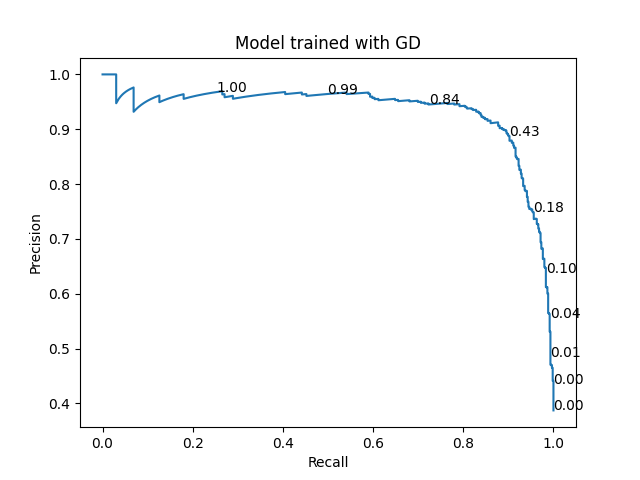

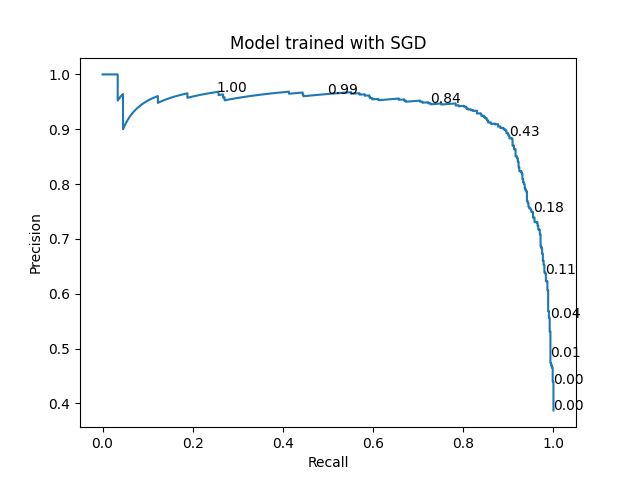

In [39]:
# Example: precision-recall curve (with annotated thresholds)
def print_precision_recall_curve(predictions, title):
    nextplot()
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, predictions)
    plt.plot(recall, precision)
    for x in np.linspace(0, 1, 10, endpoint=False):
        index = int(x * (precision.size - 1))
        plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)


print_precision_recall_curve(yhat_gd, "Model trained with GD")
print_precision_recall_curve(yhat_sgd, "Model trained with SGD")

### GD vs SGD
In the classification report we saw that the model trained with GD had a higher accuracy in total. And a higher recall for the not-spam class which is what we wanted.

Therefore we focus on the model trained with GD.

### Area under ROC curve
In the following block you can also see that GD has a higher area under the ROC curve than SGD. This means that GD is better at distinguishing between the two classes.

In [40]:
from sklearn.metrics import roc_auc_score,auc

# calculate AUC for model trained with GD
auc_gd = roc_auc_score(ytest, yhat_gd)

# calculate AUC for model trained with SGD
auc_sgd = roc_auc_score(ytest, yhat_sgd)

print("AUC for model trained with GD:", auc_gd)
print("AUC for model trained with SGD:", auc_sgd)

AUC for model trained with GD: 0.9621223622286322
AUC for model trained with SGD: 0.96190803632824


In [41]:
precision_gd, recall_gd, thresholds_gd = sklearn.metrics.precision_recall_curve(ytest, yhat_gd)

auc_gd = auc(recall_gd, precision_gd)

print("Area under precision-recall curve for GD: {:.3f}".format(auc_gd))

# Find the threshold that maximizes the area under the curve
max_index_gd = np.argmax(precision_gd * recall_gd)

threshold_gd = thresholds_gd[max_index_gd]

print("Threshold that maximizes area under precision-recall curve for GD: {:.3f}".format(threshold_gd))


Area under precision-recall curve for GD: 0.934
Threshold that maximizes area under precision-recall curve for GD: 0.456


## Exploring the weights of GD

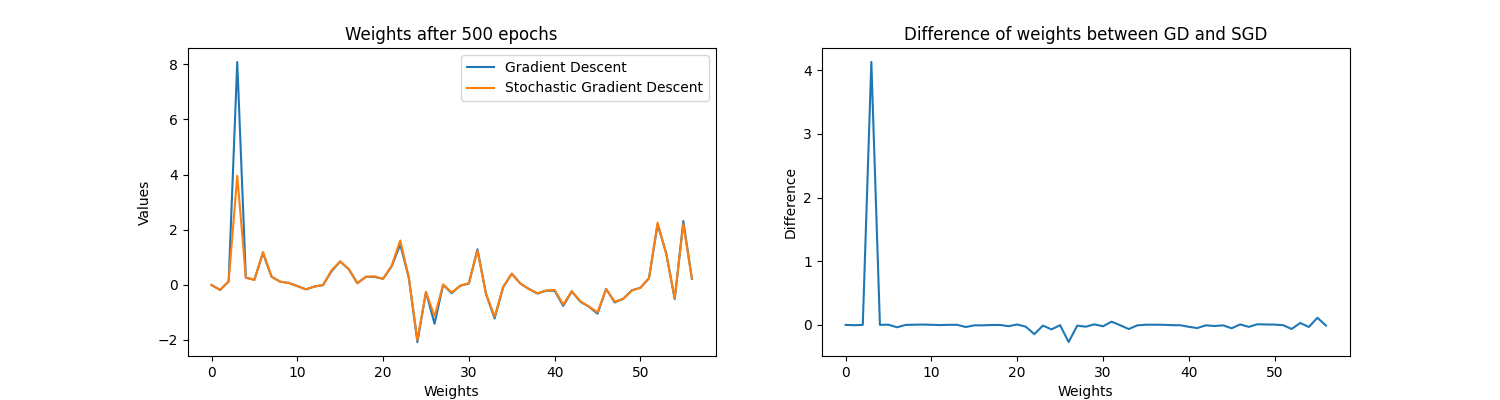

In [42]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# assuming wz_gd and wz_sgd are arrays of weights
ax1.plot(wz_gd)
ax1.plot(wz_sgd)
ax1.set_title('Weights after 500 epochs')
ax1.set_xlabel('Weights')
ax1.set_ylabel('Values')
ax1.legend(['Gradient Descent', 'Stochastic Gradient Descent'])

ax2.plot(wz_gd - wz_sgd)
ax2.set_title('Difference of weights between GD and SGD')
ax2.set_xlabel('Weights')
ax2.set_ylabel('Difference')
plt.show()


## Analysing weight vector for GD

In [39]:
average_weights = np.mean(wz_gd)
print('Average weight: {}'.format(average_weights))

print("\nPositive weights:")
wz_dict = dict(zip(features, wz_gd))
pos_wz_dict = {k: v for k, v in wz_dict.items() if v > 0}
sorted_wz_dict = sorted(pos_wz_dict.items(), key=lambda x: -x[1])
print('{:<30}{:<15}'.format('Feature', 'Weight'))
for element in sorted_wz_dict:
    print('{:<30}{:<15.4f}'.format(*element))


print("\nNegative weights:")
wz_dict = dict(zip(features, wz_gd))
neg_wz_dict = {k: v for k, v in wz_dict.items() if v < 0}
sorted_wz_dict = sorted(neg_wz_dict.items(), key=lambda x: x[1])
print('{:<30}{:<15}'.format('Feature', 'Weight'))
for element in sorted_wz_dict:
    print('{:<30}{:<15.4f}'.format(*element))


Average weight: 0.1853313966543533

Positive weights:
Feature                       Weight         
word_freq_3d                  8.0863         
capital_run_length_longest    2.3137         
char_freq_$                   2.1893         
word_freq_000                 1.4617         
word_freq_857                 1.2895         
char_freq_#                   1.1545         
word_freq_remove              1.1533         
word_freq_free                0.8437         
word_freq_font                0.6650         
word_freq_business            0.5637         
word_freq_addresses           0.4940         
word_freq_technology          0.4034         
word_freq_internet            0.2903         
word_freq_you                 0.2890         
word_freq_credit              0.2849         
word_freq_our                 0.2591         
word_freq_money               0.2543         
char_freq_!                   0.2371         
word_freq_your                0.2174         
capital_run_length_total  

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [40]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""

    return l(y, X, w) - lambda_/2 *np.sum(w ** 2)

In [41]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[-47066.64166782577, -47312.62381068291]

In [42]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    return dl(y, X, w) - lambda_ * w

In [43]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [44]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    def objective(w):
        return -l_l2(y, X, w, lambda_)

    def update(w, eps):
        return w + eps * dl_l2(y, X, w, lambda_)

    return (objective, update)
    

In [45]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

## 4b Effect of Prior

In [53]:
# we also tested with a chosen threshold of 0.5 and made some realizations about the relation between regularization and the threshold.
# see section 4.3

from sklearn.metrics import accuracy_score
yhat_gd = predict(Xtestz, wz_gd_l2)
ypred_gd = classify(Xtestz, wz_gd_l2, chosen_threshold)
print(sklearn.metrics.confusion_matrix(ytest, ypred_gd))  # true x predicted

[[907  34]
 [170 425]]


In [47]:
import pandas as pd
lambdas = []
train_log_likelihoods = []
test_log_likelihoods = []
accuracies = []
lambda_accuracy = []
def test_different_lamdas(start, end, steps, verbose=False):
    for lambda_ in np.linspace(start, end, steps):
        wz_gd_l2, _, _ = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500,verbose=False)
        ypred_gd = classify(Xtestz, wz_gd_l2, chosen_threshold)
        accuracy = accuracy_score(ytest, ypred_gd)
        if lambda_ not in lambdas:
            lambdas.append(lambda_)
            train_log_likelihoods.append(l_l2(y, Xz, wz_gd_l2, lambda_))
            test_log_likelihoods.append(l_l2(ytest, Xtestz, wz_gd_l2, lambda_))
            accuracies.append(accuracy)
            lambda_accuracy.append([lambda_, accuracy])
        if verbose:
            print("Lambda: {}".format(lambda_))
            print("Training data log likelihood: {}".format(l_l2(y, Xz, wz_gd_l2, lambda_)))
            print("Test data log likelihood: {}".format(l_l2(ytest, Xtestz, wz_gd_l2, lambda_)))
            print("Accuracy: {:.2f}%".format(accuracy * 100))

In [48]:
test_different_lamdas(0, 1, 11, verbose=True)
test_different_lamdas(0, 10, 11)
test_different_lamdas(0, 100, 11)
test_different_lamdas(0, 1000, 11)

Lambda: 0.0
Training data log likelihood: -655.413496469943
Test data log likelihood: -427.3442004173766
Accuracy: 90.69%
Lambda: 0.1
Training data log likelihood: -661.358458939445
Test data log likelihood: -432.15494362415143
Accuracy: 90.76%
Lambda: 0.2
Training data log likelihood: -665.700872042942
Test data log likelihood: -435.5377562965536
Accuracy: 90.76%
Lambda: 0.30000000000000004
Training data log likelihood: -669.0425416634434
Test data log likelihood: -438.06550919904026
Accuracy: 90.76%
Lambda: 0.4
Training data log likelihood: -671.7730292857699
Test data log likelihood: -440.0753552760653
Accuracy: 90.76%
Lambda: 0.5
Training data log likelihood: -674.1008281100458
Test data log likelihood: -441.7501659024027
Accuracy: 90.69%
Lambda: 0.6000000000000001
Training data log likelihood: -676.1517655688136
Test data log likelihood: -443.20007490436916
Accuracy: 90.62%
Lambda: 0.7000000000000001
Training data log likelihood: -678.0094320378807
Test data log likelihood: -444.4

In [49]:
for i in range(len(lambdas)-1):
    if train_log_likelihoods[i] < train_log_likelihoods[i+1]:
        print(train_log_likelihoods[i])

    if test_log_likelihoods[i] < test_log_likelihoods[i+1]:
        print(test_log_likelihoods[i])

    if accuracies[i] < accuracies[i+1]:
        print("Lambda value better than its predecessor: {}".format(lambdas[i+1]))
        print("Accuracy:", accuracies[i+1])

# displaying the results
data = {'lambda': lambdas, 
    'training_log_likelihood': train_log_likelihoods, 
    'test_log_likelihood': test_log_likelihoods, 
    'accuracy': accuracies}
df = pd.DataFrame(data)
display(df)

Lambda value better than its predecessor: 0.1
Accuracy: 0.9075520833333334
Lambda value better than its predecessor: 1.0
Accuracy: 0.90625
Lambda value better than its predecessor: 7.0
Accuracy: 0.90234375
Lambda value better than its predecessor: 9.0
Accuracy: 0.9010416666666666
Lambda value better than its predecessor: 50.0
Accuracy: 0.892578125


,lambda,training_log_likelihood,test_log_likelihood,accuracy
0,0.0,-655.413496,-427.344200,0.906901
1,0.1,-661.358459,-432.154944,0.907552
2,0.2,-665.700872,-435.537756,0.907552
3,0.3,-669.042542,-438.065509,0.907552
4,0.4,-671.773029,-440.075355,0.907552
5,0.5,-674.100828,-441.750166,0.906901
6,0.6,-676.151766,-443.200075,0.906250
7,0.7,-678.009432,-444.496736,0.906250
8,0.8,-679.724246,-445.672702,0.906250
9,0.9,-681.330210,-446.782560,0.905599


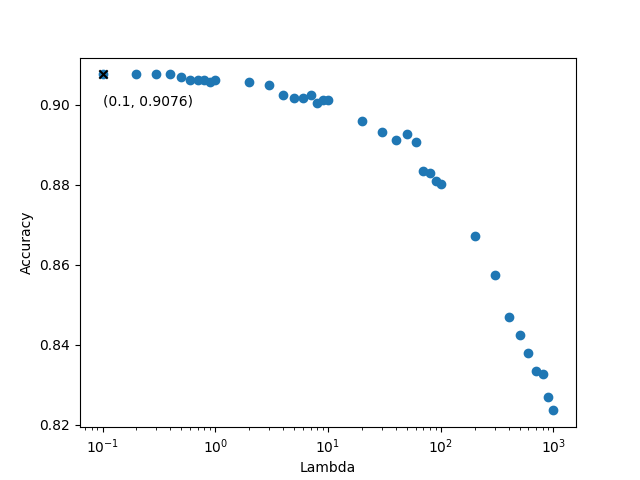

In [50]:
nextplot()
plot_points = np.array(lambda_accuracy)
plt.scatter(plot_points[:,0], plot_points[:,1])
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.xscale('log')

#highlight the max
max_acc = max(plot_points[:,1])
max_lambda = plot_points[:,0][np.argmax(plot_points[:,1])]
plt.scatter(max_lambda, max_acc,marker="x",label = 'Max Accuracy', color = 'black')
plt.annotate("({}, {:.4f})".format(max_lambda, max_acc), xy=(max_lambda, max_acc-0.008))


plt.show()


In [51]:
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500,verbose=False)
yhat_gd = predict(Xtestz, wz_gd)
ypred_gd = classify(Xtestz, wz_gd)

print(sklearn.metrics.confusion_matrix(ytest, ypred_gd))  # true x predicted
print(sklearn.metrics.classification_report(ytest, ypred_gd, digits=3))


optimal_lambda = 8
print("With prior. Lambda = {}".format(optimal_lambda))
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, optimal_lambda), w0, nepochs=500,verbose=False)
yhat_gd = predict(Xtestz, wz_gd_l2)
ypred_gd = classify(Xtestz, wz_gd_l2)
print(sklearn.metrics.confusion_matrix(ytest, ypred_gd))  # true x predicted
print(sklearn.metrics.classification_report(ytest, ypred_gd, digits=3))




[[887  54]
 [ 71 524]]
              precision    recall  f1-score   support

           0      0.926     0.943     0.934       941
           1      0.907     0.881     0.893       595

    accuracy                          0.919      1536
   macro avg      0.916     0.912     0.914      1536
weighted avg      0.918     0.919     0.918      1536

With prior. Lambda = 8
[[889  52]
 [ 72 523]]
              precision    recall  f1-score   support

           0      0.925     0.945     0.935       941
           1      0.910     0.879     0.894       595

    accuracy                          0.919      1536
   macro avg      0.917     0.912     0.914      1536
weighted avg      0.919     0.919     0.919      1536



## 4c Composition of Weight Vector

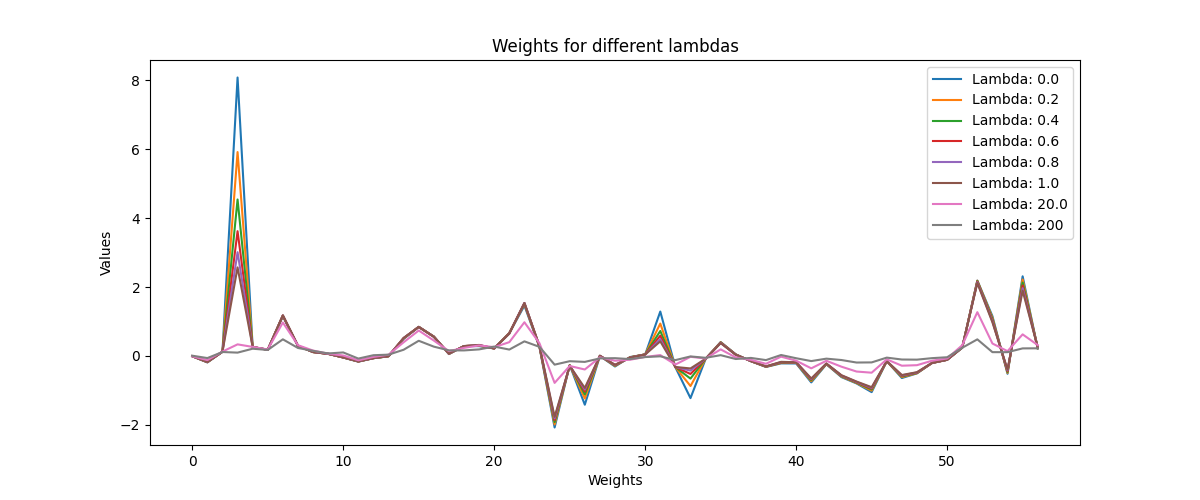

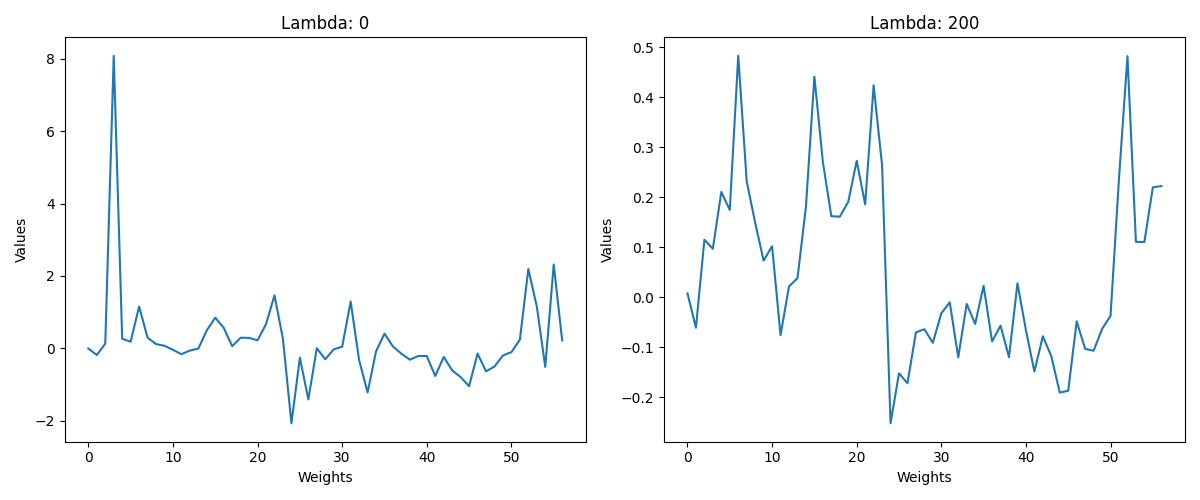

In [52]:
weights = []
for lambda_ in lambdas[:12:2]+[lambdas[20]]:
    wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500,verbose=False)
    weights.append((wz_gd_l2,lambda_))

high_lambda = 200
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, high_lambda), w0, nepochs=500,verbose=False)
weights.append((wz_gd_l2,high_lambda))
plt.figure(figsize=(12,5))
for w,lambda_ in weights:
    plt.plot(w)
plt.title('Weights for different lambdas')
plt.xlabel('Weights')
plt.ylabel('Values')
plt.legend(['Lambda: {}'.format(round(lambda_,2)) for w,lambda_ in weights])
plt.show()
# plt.savefig('weights_lambdas.png')
    
# Plot 1: wz_gd
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(wz_gd)
plt.title('Lambda: 0')
plt.xlabel('Weights')
plt.ylabel('Values')

# Plot 2: wz_gd_l2
plt.subplot(1, 2, 2)
plt.plot(wz_gd_l2)
plt.title('Lambda: {}'.format(high_lambda))
plt.xlabel('Weights')
plt.ylabel('Values')

# Display the plots
plt.tight_layout()
plt.show()
# plt.savefig('distribution_diff.png')
    

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [95]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

ModuleNotFoundError: No module named 'torch'

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)